## 1. Prepare images: background subtraction and construction of variance images

In this tutorial, we will analyze spatially resolved spectrophotometric SEDs (i.e., combination of photometry and spectroscopy) of a local galaxy NGC 309. We will use 12-bands imaging data from the GALEX, SDSS, 2MASS, and WISE, and integral field spectroscopy (IFS) data from the CALIFA survey. Data can downloaded from the following websites:
- GALEX: [link](http://galex.stsci.edu/GR6/?page=tilelist&survey=allsurveys&showall=Y)
- SDSS: [link](https://skyserver.sdss.org/dr12/en/tools/explore/Summary.aspx?)
- 2MASS: [link](https://irsa.ipac.caltech.edu/applications/2MASS/IM/interactive.html)
- WISE: [link](https://irsa.ipac.caltech.edu/applications/wise/) (Note: in addition to the intensity images, please download the uncertainty images)
- CALIFA: [link](https://califa.caha.es/?q=content/califa-3rd-data-release)
    
The imaging and IFS data that are used in this tutorial have been uploaded on this [link](https://drive.google.com/drive/folders/1RKJAHLFXNZdWLPbQ-i4Po8WjKcUbGx_m?usp=sharing). 

Alternatively, one can use functions available in `piXedfit_images` module for downloading imaging data from the GALEX, SDSS, 2MASS, and WISE servers for a specific target galaxy, given the coordinate of the galaxy. A tutorial on this is given [here](https://github.com/aabdurrouf/piXedfit/blob/main/examples/Download_images.ipynb).

In this first step, we will perform background subtraction and constructing variance images.

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from mpl_toolkits.axes_grid1 import make_axes_locatable

import warnings
warnings.filterwarnings('ignore')

### Coordinate and redshift of the target galaxy

In [2]:
gal_ra = 14.177751925               
gal_dec = -9.913864294
gal_z = 0.0188977

### 1.1. GALEX Images
Since GALEX images are background-free, we will only derive variance images (i.e. square of uncertainty images).

### 1.1.1.  GALEX/FUV

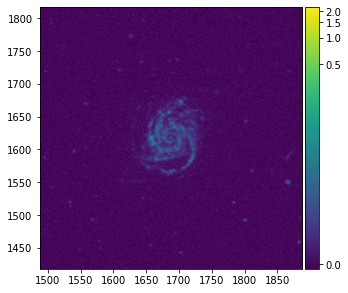

In [3]:
hdu = fits.open("GI1_009100_NGC0309-fd-intbgsub.fits")
data_image = hdu[0].data
wcs = WCS(hdu[0].header)
gal_x, gal_y = wcs.wcs_world2pix(gal_ra, gal_dec, 1)
hdu.close()

fig1 = plt.figure(figsize=(5,5))
f1 = plt.subplot()
plt.xlim(gal_x-200,gal_x+200)
plt.ylim(gal_y-200,gal_y+200)
norm = ImageNormalize(stretch=LogStretch())
im = plt.imshow(data_image, norm=norm, origin='lower')
divider = make_axes_locatable(f1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

Variance images of GALEX can be calculated using function `piXedfit.piXedfit_images.var_img_GALEX`

In [4]:
from piXedfit.piXedfit_images import var_img_GALEX

sci_img = "GI1_009100_NGC0309-fd-intbgsub.fits"
skybg_img = "GI1_009100_NGC0309-fd-skybg.fits"
var_img_GALEX(sci_img=sci_img, skybg_img=skybg_img, filter_name='galex_fuv')

'var_GI1_009100_NGC0309-fd-intbgsub.fits'

### 1.1.2. GALEX/NUV

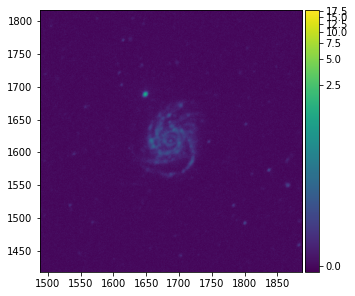

In [5]:
hdu = fits.open("GI1_009100_NGC0309-nd-intbgsub.fits")
data_image = hdu[0].data
wcs = WCS(hdu[0].header)
gal_x, gal_y = wcs.wcs_world2pix(gal_ra, gal_dec, 1)
hdu.close()

fig1 = plt.figure(figsize=(5,5))
f1 = plt.subplot()
plt.xlim(gal_x-200,gal_x+200)
plt.ylim(gal_y-200,gal_y+200)
norm = ImageNormalize(stretch=LogStretch())
im = plt.imshow(data_image, norm=norm, origin='lower')
divider = make_axes_locatable(f1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

In [6]:
sci_img = "GI1_009100_NGC0309-nd-intbgsub.fits"
skybg_img = "GI1_009100_NGC0309-nd-skybg.fits"
var_img_GALEX(sci_img=sci_img, skybg_img=skybg_img, filter_name='galex_nuv')

'var_GI1_009100_NGC0309-nd-intbgsub.fits'

### 1.2. SDSS Images
SDSS images are background-free, so we only need to calculate variance images. This can be performed using `piXedfit.piXedfit_images.var_img_sdss` function. </font>

### 1.2.1. SDSS/u

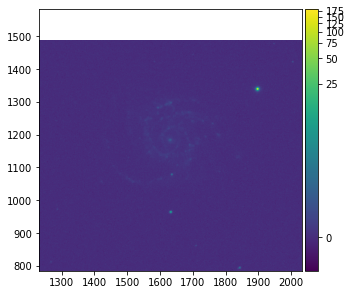

In [7]:
# check image
hdu = fits.open("frame-u-001740-3-0115.fits")
data_image = hdu[0].data
wcs = WCS(hdu[0].header)
gal_x, gal_y = wcs.wcs_world2pix(gal_ra, gal_dec, 1)
hdu.close()

fig1 = plt.figure(figsize=(5,5))
f1 = plt.subplot()
plt.xlim(gal_x-400,gal_x+400)
plt.ylim(gal_y-400,gal_y+400)
norm = ImageNormalize(stretch=LogStretch())
im = plt.imshow(data_image, norm=norm, origin='lower')
divider = make_axes_locatable(f1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

In [8]:
from piXedfit.piXedfit_images import var_img_sdss

fits_image = "frame-u-001740-3-0115.fits"
var_img_sdss(fits_image, filter_name='sdss_u')

'var_frame-u-001740-3-0115.fits'

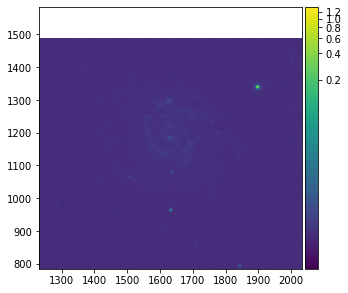

In [9]:
# check variance image
hdu = fits.open("var_frame-u-001740-3-0115.fits")
data_image = hdu[0].data
wcs = WCS(hdu[0].header)
gal_x, gal_y = wcs.wcs_world2pix(gal_ra, gal_dec, 1)
hdu.close()

fig1 = plt.figure(figsize=(5,5))
f1 = plt.subplot()
plt.xlim(gal_x-400,gal_x+400)
plt.ylim(gal_y-400,gal_y+400)
norm = ImageNormalize(stretch=LogStretch())
im = plt.imshow(data_image, norm=norm, origin='lower')
divider = make_axes_locatable(f1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

### 1.2.2. SDSS/g

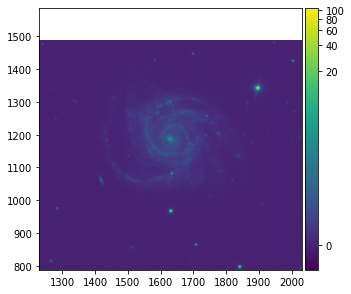

In [10]:
hdu = fits.open("frame-g-001740-3-0115.fits")
data_image = hdu[0].data
wcs = WCS(hdu[0].header)
gal_x, gal_y = wcs.wcs_world2pix(gal_ra, gal_dec, 1)
hdu.close()

fig1 = plt.figure(figsize=(5,5))
f1 = plt.subplot()
plt.xlim(gal_x-400,gal_x+400)
plt.ylim(gal_y-400,gal_y+400)
norm = ImageNormalize(stretch=LogStretch())
im = plt.imshow(data_image, norm=norm, origin='lower')
divider = make_axes_locatable(f1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

In [11]:
fits_image = "frame-g-001740-3-0115.fits"
var_img_sdss(fits_image, filter_name='sdss_g')

'var_frame-g-001740-3-0115.fits'

### 1.2.3. SDSS/r

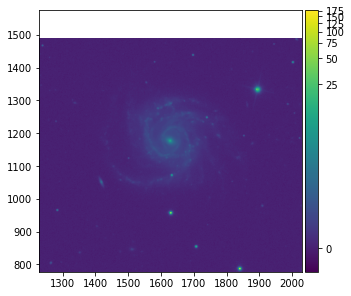

In [12]:
hdu = fits.open("frame-r-001740-3-0115.fits")
data_image = hdu[0].data
wcs = WCS(hdu[0].header)
gal_x, gal_y = wcs.wcs_world2pix(gal_ra, gal_dec, 1)
hdu.close()

fig1 = plt.figure(figsize=(5,5))
f1 = plt.subplot()
plt.xlim(gal_x-400,gal_x+400)
plt.ylim(gal_y-400,gal_y+400)
norm = ImageNormalize(stretch=LogStretch())
im = plt.imshow(data_image, norm=norm, origin='lower')
divider = make_axes_locatable(f1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

In [13]:
fits_image = "frame-r-001740-3-0115.fits"
var_img_sdss(fits_image, filter_name='sdss_r')

'var_frame-r-001740-3-0115.fits'

### 1.2.4. SDSS/i

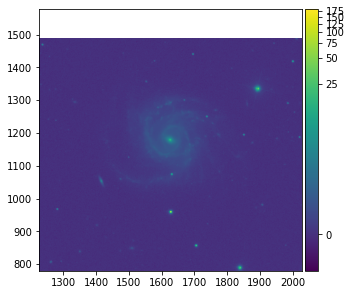

In [14]:
hdu = fits.open("frame-i-001740-3-0115.fits")
data_image = hdu[0].data
wcs = WCS(hdu[0].header)
gal_x, gal_y = wcs.wcs_world2pix(gal_ra, gal_dec, 1)
hdu.close()

fig1 = plt.figure(figsize=(5,5))
f1 = plt.subplot()
plt.xlim(gal_x-400,gal_x+400)
plt.ylim(gal_y-400,gal_y+400)
norm = ImageNormalize(stretch=LogStretch())
im = plt.imshow(data_image, norm=norm, origin='lower')
divider = make_axes_locatable(f1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

In [15]:
fits_image = "frame-i-001740-3-0115.fits"
var_img_sdss(fits_image, filter_name='sdss_i')

'var_frame-i-001740-3-0115.fits'

### 1.2.5. SDSS/z

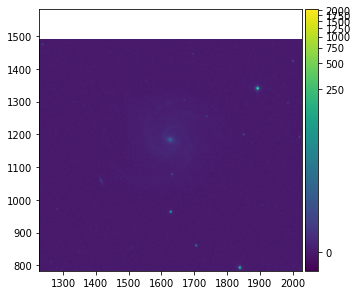

In [16]:
hdu = fits.open("frame-z-001740-3-0115.fits")
data_image = hdu[0].data
wcs = WCS(hdu[0].header)
gal_x, gal_y = wcs.wcs_world2pix(gal_ra, gal_dec, 1)
hdu.close()

fig1 = plt.figure(figsize=(5,5))
f1 = plt.subplot()
plt.xlim(gal_x-400,gal_x+400)
plt.ylim(gal_y-400,gal_y+400)
norm = ImageNormalize(stretch=LogStretch())
im = plt.imshow(data_image, norm=norm, origin='lower')
divider = make_axes_locatable(f1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

In [17]:
fits_image = "frame-z-001740-3-0115.fits"
var_img_sdss(fits_image, filter_name='sdss_z')

'var_frame-z-001740-3-0115.fits'

### 1.3. 2MASS Images

Because 2MASS images are not background-free, we need to perform background-subtraction before calculating variance images. Background subtraction can be performed using function `piXedfit.piXedfit_images.subtract_background` and variance images can be calculated using function `piXedfit.piXedfit_images.var_img_2MASS`.

### 1.3.1. 2MASS/J

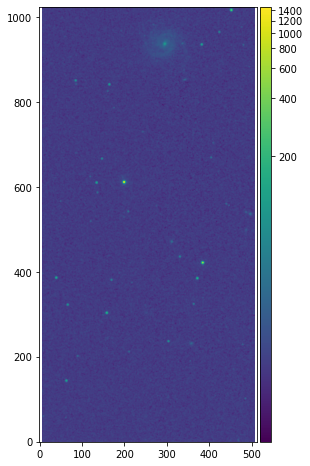

In [18]:
hdu = fits.open("aJ_asky_001022s0620186.fits")
data_image = hdu[0].data
hdu.close()

fig1 = plt.figure(figsize=(5,8))
f1 = plt.subplot()
norm = ImageNormalize(stretch=LogStretch())
im = plt.imshow(data_image, norm=norm, origin='lower')
divider = make_axes_locatable(f1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

In [19]:
# Perform background subtraction
from piXedfit.piXedfit_images import subtract_background

fits_image = "aJ_asky_001022s0620186.fits"
subtract_background(fits_image, sigma=3.0, box_size=[100,100], mask_sources=True)

produce skybg_aJ_asky_001022s0620186.fits
produce skybgrms_aJ_asky_001022s0620186.fits
produce skybgsub_aJ_asky_001022s0620186.fits


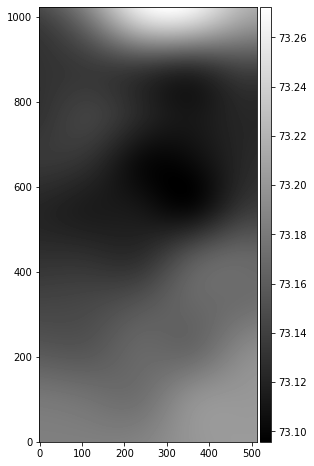

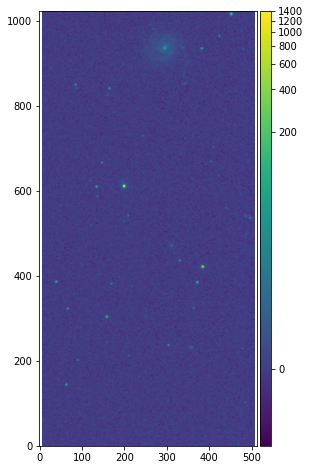

In [20]:
# check background image
hdu = fits.open("skybg_aJ_asky_001022s0620186.fits")
data_image = hdu[0].data
hdu.close()
fig1 = plt.figure(figsize=(5,8))
f1 = plt.subplot()
im = plt.imshow(data_image, origin='lower', cmap='gray')
divider = make_axes_locatable(f1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

# check background-subtracted image
hdu = fits.open("skybgsub_aJ_asky_001022s0620186.fits")
data_image = hdu[0].data
hdu.close()
fig1 = plt.figure(figsize=(5,8))
f1 = plt.subplot()
norm = ImageNormalize(stretch=LogStretch())
im = plt.imshow(data_image, norm=norm, origin='lower')
divider = make_axes_locatable(f1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

In [21]:
# construct variance image
from piXedfit.piXedfit_images import var_img_2MASS

sci_img = "skybgsub_aJ_asky_001022s0620186.fits"
skyrms_img = "skybgrms_aJ_asky_001022s0620186.fits"
var_img_2MASS(sci_img=sci_img, skyrms_img=skyrms_img)

'var_skybgsub_aJ_asky_001022s0620186.fits'

### 1.3.2. 2MASS/H

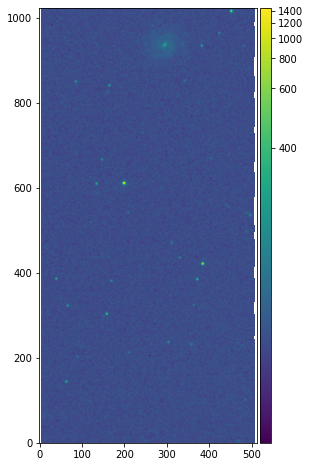

In [22]:
hdu = fits.open("aH_asky_001022s0620186.fits")
data_image = hdu[0].data
hdu.close()

fig1 = plt.figure(figsize=(5,8))
f1 = plt.subplot()
norm = ImageNormalize(stretch=LogStretch())
im = plt.imshow(data_image, norm=norm, origin='lower')
divider = make_axes_locatable(f1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

In [23]:
fits_image = "aH_asky_001022s0620186.fits"
subtract_background(fits_image, sigma=3.0, box_size=[100,100], mask_sources=True)

produce skybg_aH_asky_001022s0620186.fits
produce skybgrms_aH_asky_001022s0620186.fits
produce skybgsub_aH_asky_001022s0620186.fits


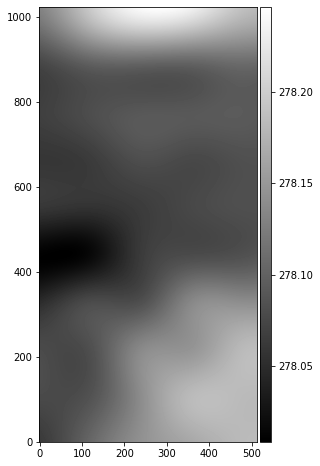

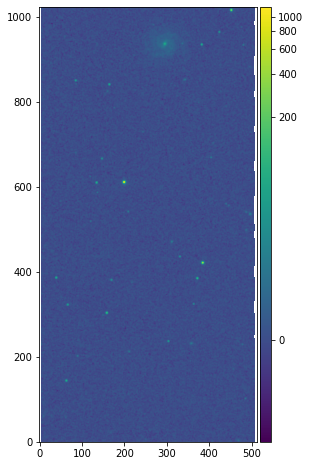

In [24]:
# check background image
hdu = fits.open("skybg_aH_asky_001022s0620186.fits")
data_image = hdu[0].data
hdu.close()
fig1 = plt.figure(figsize=(5,8))
f1 = plt.subplot()
norm = ImageNormalize(stretch=LogStretch())
im = plt.imshow(data_image, origin='lower', cmap='gray')
divider = make_axes_locatable(f1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)


# check background-subtracted image
hdu = fits.open("skybgsub_aH_asky_001022s0620186.fits")
data_image = hdu[0].data
hdu.close()
fig1 = plt.figure(figsize=(5,8))
f1 = plt.subplot()
norm = ImageNormalize(stretch=LogStretch())
im = plt.imshow(data_image, norm=norm, origin='lower')
divider = make_axes_locatable(f1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

In [25]:
sci_img = "skybgsub_aH_asky_001022s0620186.fits"
skyrms_img = "skybgrms_aH_asky_001022s0620186.fits"
var_img_2MASS(sci_img=sci_img, skyrms_img=skyrms_img)

'var_skybgsub_aH_asky_001022s0620186.fits'

### 1.3.3. 2MASS/Ks

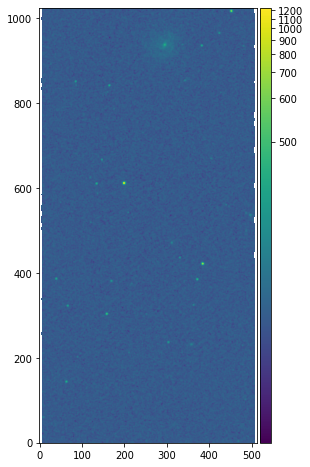

In [26]:
hdu = fits.open("aK_asky_001022s0620186.fits")
data_image = hdu[0].data
hdu.close()

fig1 = plt.figure(figsize=(5,8))
f1 = plt.subplot()
norm = ImageNormalize(stretch=LogStretch())
im = plt.imshow(data_image, norm=norm, origin='lower')
divider = make_axes_locatable(f1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

In [27]:
fits_image = "aK_asky_001022s0620186.fits"
subtract_background(fits_image, sigma=3.0, box_size=[100,100], mask_sources=True)

produce skybg_aK_asky_001022s0620186.fits
produce skybgrms_aK_asky_001022s0620186.fits
produce skybgsub_aK_asky_001022s0620186.fits


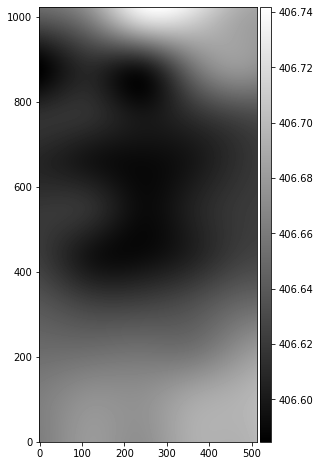

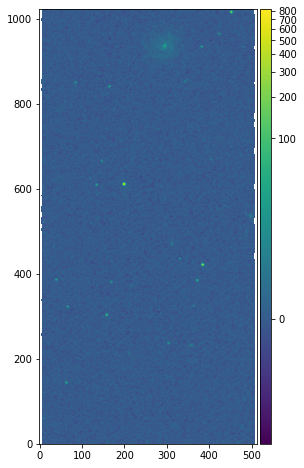

In [28]:
# check background image
hdu = fits.open("skybg_aK_asky_001022s0620186.fits")
data_image = hdu[0].data
hdu.close()
fig1 = plt.figure(figsize=(5,8))
f1 = plt.subplot()
norm = ImageNormalize(stretch=LogStretch())
im = plt.imshow(data_image, origin='lower', cmap='gray')
divider = make_axes_locatable(f1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)


# check background-subtracted image
hdu = fits.open("skybgsub_aK_asky_001022s0620186.fits")
data_image = hdu[0].data
hdu.close()
fig1 = plt.figure(figsize=(5,8))
f1 = plt.subplot()
norm = ImageNormalize(stretch=LogStretch())
im = plt.imshow(data_image, norm=norm, origin='lower')
divider = make_axes_locatable(f1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

In [29]:
sci_img = "skybgsub_aK_asky_001022s0620186.fits"
skyrms_img = "skybgrms_aK_asky_001022s0620186.fits"
var_img_2MASS(sci_img=sci_img, skyrms_img=skyrms_img)

'var_skybgsub_aK_asky_001022s0620186.fits'

### 1.4. WISE Images

WISE images are not background-free, so we need to perform background-subtraction before deriving variance images. Background subtraction can be performed using `piXedfit.piXedfit_images.subtract_background` and variance images can be calculated using `piXedfit.piXedfit_images.var_img_WISE`.

### 1.4.1. WISE/W1

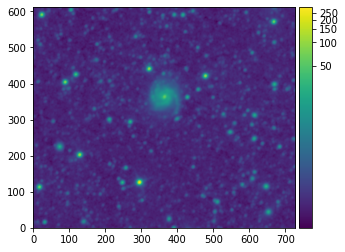

In [30]:
hdu = fits.open("0138m107_ac51-w1-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits")
data_image = hdu[0].data
hdu.close()

fig1 = plt.figure(figsize=(5,10))
f1 = plt.subplot()
norm = ImageNormalize(stretch=LogStretch())
im = plt.imshow(data_image, norm=norm, origin='lower')
divider = make_axes_locatable(f1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

In [31]:
# background subtraction
fits_image = "0138m107_ac51-w1-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits"
subtract_background(fits_image, sigma=3.0, box_size=[100,100], mask_sources=True)

produce skybg_0138m107_ac51-w1-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits
produce skybgrms_0138m107_ac51-w1-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits
produce skybgsub_0138m107_ac51-w1-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits


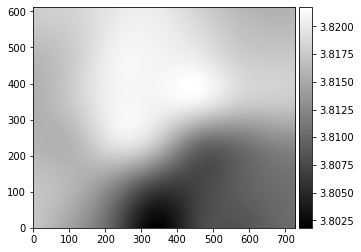

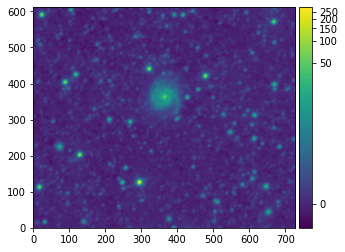

In [32]:
# check background image
hdu = fits.open("skybg_0138m107_ac51-w1-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits")
data_image = hdu[0].data
hdu.close()
fig1 = plt.figure(figsize=(5,10))
f1 = plt.subplot()
norm = ImageNormalize(stretch=LogStretch())
im = plt.imshow(data_image, origin='lower', cmap='gray')
divider = make_axes_locatable(f1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)


# check background-subtracted image
hdu = fits.open("skybgsub_0138m107_ac51-w1-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits")
data_image = hdu[0].data
hdu.close()
fig1 = plt.figure(figsize=(5,10))
f1 = plt.subplot()
norm = ImageNormalize(stretch=LogStretch())
im = plt.imshow(data_image, norm=norm, origin='lower')
divider = make_axes_locatable(f1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

In [33]:
# calculating variance image
from piXedfit.piXedfit_images import var_img_WISE

sci_img = "skybgsub_0138m107_ac51-w1-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits"
unc_img = "0138m107_ac51-w1-unc-3_ra14.177751925_dec-9.913864294_asec1000.000.fits"
skyrms_img = "skybgrms_0138m107_ac51-w1-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits"
var_img_WISE(sci_img=sci_img, unc_img=unc_img, filter_name='wise_w1', skyrms_img=skyrms_img)

'var_0138m107_ac51-w1-unc-3_ra14.177751925_dec-9.913864294_asec1000.000.fits'

### 1.4.2. WISE/W2

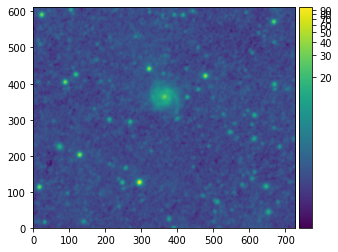

In [34]:
hdu = fits.open("0138m107_ac51-w2-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits")
data_image = hdu[0].data
hdu.close()

fig1 = plt.figure(figsize=(5,10))
f1 = plt.subplot()
norm = ImageNormalize(stretch=LogStretch())
im = plt.imshow(data_image, norm=norm, origin='lower')
divider = make_axes_locatable(f1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

In [35]:
fits_image = "0138m107_ac51-w2-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits" 
subtract_background(fits_image, sigma=3.0, box_size=[100,100], mask_sources=True)

produce skybg_0138m107_ac51-w2-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits
produce skybgrms_0138m107_ac51-w2-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits
produce skybgsub_0138m107_ac51-w2-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits


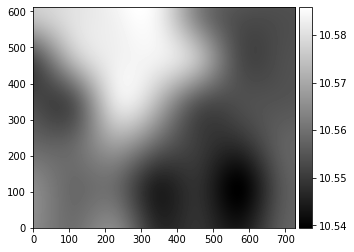

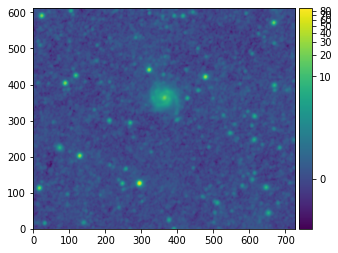

In [36]:
# check background image
hdu = fits.open("skybg_0138m107_ac51-w2-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits")
data_image = hdu[0].data
hdu.close()
fig1 = plt.figure(figsize=(5,10))
f1 = plt.subplot()
norm = ImageNormalize(stretch=LogStretch())
im = plt.imshow(data_image, origin='lower', cmap='gray')
divider = make_axes_locatable(f1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

# check background-subtracted image
hdu = fits.open("skybgsub_0138m107_ac51-w2-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits")
data_image = hdu[0].data
hdu.close()
fig1 = plt.figure(figsize=(5,10))
f1 = plt.subplot()
norm = ImageNormalize(stretch=LogStretch())
im = plt.imshow(data_image, norm=norm, origin='lower')
divider = make_axes_locatable(f1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

In [37]:
sci_img = "skybgsub_0138m107_ac51-w2-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits"
unc_img = "0138m107_ac51-w2-unc-3_ra14.177751925_dec-9.913864294_asec1000.000.fits"
skyrms_img = "skybgrms_0138m107_ac51-w2-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits"
var_img_WISE(sci_img=sci_img, unc_img=unc_img, filter_name='wise_w2', skyrms_img=skyrms_img)

'var_0138m107_ac51-w2-unc-3_ra14.177751925_dec-9.913864294_asec1000.000.fits'